In [223]:
from ant import Ant
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from functools import lru_cache

In [224]:
def boundary_1(x, y):
    if (x**2 + y**2) <= 2:
        return True
    return False

def boundary_2(x, y):
    if ((x-2.5)/30)**2 + ((y-2.5)/40)**2 < 1:
        return True
    return False

# Bill: A Clueless Hungry Ant

## Initialize Bill

Hi! My name is Bill, and I am a clueless ant is search for food!
In my search for food, I will start from (0, 0)
Please wait while I calculate all the transition points that I can visit (even I should not be aware of them xD)
Ok, I am ready to go!
Below are the admissible transition points


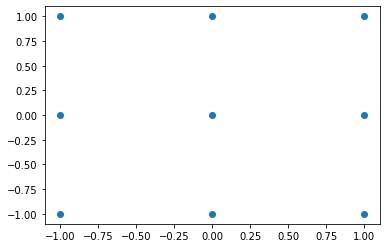

In [225]:
bill = Ant(boundary_function=boundary_1, workers=7)
print('Below are the admissible transition points')
bill.show_transition_points()

## Solutions

### Markov Solution

In [226]:
bill.get_markov_solution()

Bill has to do 4.5 steps on average to reach the food. Poor Bill!


### Recursive Solution

In [227]:
def get_adiacent(x,y) -> set:
    """Returns the set of points that are adiacent to a given (x,y) point.
    """
    return set([(x-1,y), (x,y-1), (x+1,y), (x,y+1)])

In [228]:
transition_points = bill.points
transition_points

[(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)]

In [229]:
@lru_cache(maxsize = 100000000)
def get_probability_recusive(t,p):
    if (t == 0) and (p == (0,0)):
        return 1
    if t == 0:
        return 0
    adiacents = get_adiacent(p[0], p[1])
    admissible_adiacents = list(set(transition_points).intersection(adiacents))
    return sum([0.25*get_probability_recusive(t-1,adiacent) for adiacent in admissible_adiacents])

In [230]:
def get_first_non_transition_points(admissible_points):
    all_points = set()
    for point in admissible_points:
        all_points = all_points.union(get_adiacent(point[0], point[1]))
    return list(all_points - set(admissible_points))

In [231]:
def calculate_avg_steps_recursive():
    steps = 100000
    data = pd.DataFrame(index = list(range(steps)), columns=['p_is_end'])
    for t in range(steps):
        first_non_transition_points = get_first_non_transition_points(transition_points)
        p_t = []
        for point in first_non_transition_points:
            p_t.append(get_probability_recusive(t,point))
        data.loc[t, 'p_is_end'] = sum(p_t)

    data = data.reset_index(drop = False).rename(columns={'index':'steps'})
    data['step_p'] = data['steps'] * data['p_is_end']

In [232]:
data['step_p'].sum()

4.5

In [234]:
data

,steps,p_is_end,step_p
0,0,0,0
1,1,0.0,0.0
2,2,0.25,0.5
3,3,0.25,0.75
4,4,0.125,0.5
...,...,...,...
99995,99995,0.0,0.0
99996,99996,0.0,0.0
99997,99997,0.0,0.0
99998,99998,0.0,0.0


### Monte Carlo Simulation

Bill has to do 4.502228 steps on average to reach the food. Poor Bill!


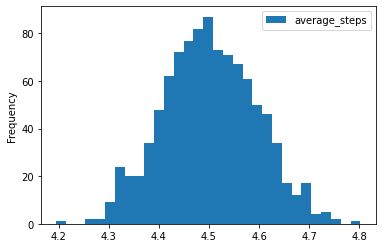

In [233]:
monte_carlo = bill.do_monte_carlo_avg_steps_multpross(n_samples=1000)
fig, ax = plt.subplots(1)
monte_carlo.plot.hist(bins = int(np.floor(np.sqrt(len(monte_carlo)))), column = ['average_steps'], ax = ax)
plt.show()